# <u> Projet : Collision entre deux boules de pétanques<u>

## <u>Introduction : <u>

Conditions initiales :

Vitesse de lancer $v_0 = 8$ m/s

Masse $m$ de la boule de pétanque : $m = 0.8$kg 

diamètre de la boule =$75 * 10^-3$ m

Surface de la boule $S = 2*10^-3$ m$^3$

Accélération de la pesanteur sur Terre $g = 9.81$ m/s

Angle initial avec l'horizontal $\theta = 45° = \frac{\pi}{4}$

Hauteur de lancée : $y_0 = 0.8$ m

## <u>Partie 1 : Lancer<u>

Force de trainée $F = \frac{1}{2} \rho S C_x v^2$

Coéfficient de traînée de la boule : $C_x = 0.45$

Masse volumique de l'air : $\rho_{air} = 1.2$ kg/ m$^3$

Poids de la boule : $P = mg$

Principe fondamental de la dynamique : $m a = P - F = mg -  \frac{1}{2} \rho S C_x v_0^2$

Après intégration : $y(t) = \frac{1}{2} gt^2 - \frac{\rho S C_x v_o^2 t^2}{4m}  + v_ot + y_0$

Equation diiférentielle à résoudre :

$$\frac{d^2y}{dt^2}(\frac{g}{2}-\frac{\rho S C_x v_0^2}{4m}) + \frac{dy}{dt} v_o = - y_0$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, PPoly
import matplotlib.animation as animation
from IPython.display import HTML

In [3]:
# Définition des paramètres

ti = 0 
te = 1.9
step = 0.01
v_0 = 6  # vitesse initiale en m/s
theta = np.pi / 4  # angle de tir en radians
g = 9.81  # accélération due à la gravité en m/s^2
m = 0.8  # masse de la boule de pétanque en kg
k = 0.03  # coefficient de frottement de l'air en N*s/m

In [4]:
def derivee_u(u, t, k, m, g):
    # u est un vecteur [x, y, v_x, v_y]
    dxdt = u[2] 
    dydt = u[3] 
    dvxdt = - (k / 4*m) * u[2] 
    dvydt = - (g/2) - (k / 4*m) * u[3]
    return np.array([dxdt, dydt, dvxdt, dvydt])

u_ini = np.array([0, 0.8, v_0 * np.cos(theta), v_0 * np.sin(theta)])  # Conditions initiales sur u [x0, y0, vx0, vy0]

In [5]:
#Méthode Runge-Kutta

def rk4(start, end, step, k, m, g, u_ini):
    interval = end - start
    num_points = int(interval / step) + 1
    t = np.linspace(start, end, num_points)
    ordre = len(u_ini)
    u = np.empty((ordre, num_points))
    u[:, 0] = u_ini

    for i in range(num_points - 1):
        d1 = derivee_u(u[:, i], t[i], k, m, g)
        d2 = derivee_u(u[:, i] + step / 2 * d1, t[i] + step / 2, k, m, g)
        d3 = derivee_u(u[:, i] + step / 2 * d2, t[i] + step / 2, k, m, g)
        d4 = derivee_u(u[:, i] + step * d3, t[i] + step, k, m, g)
        u[:, i + 1] = u[:, i] + step / 6 * (d1 + 2 * d2 + 2 * d3 + d4)

    return t, u

# Appeler la fonction rk4
t, urk4 = rk4(ti, te, step, k, m, g, u_ini)

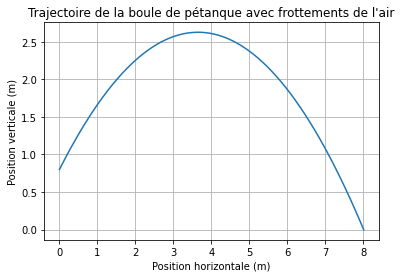

In [6]:
# On trace la courbe
plt.plot(urk4[0, :], urk4[1, :])
plt.xlabel('Position horizontale (m)')
plt.ylabel('Position verticale (m)')
plt.title('Trajectoire de la boule de pétanque avec frottements de l\'air')
plt.grid(True)
plt.show()

Le lancer dure 1,28 secondes donc le point d'impact est le 128ème point.

In [7]:
print("Vitesse sur x avant l'impact :", urk4[2, 190], "en m/s")

Vitesse sur x avant l'impact : 4.194549225447061 en m/s


## 2. Impact sur le sol

In [8]:
print("Point d'impact :", urk4[0, 190], "en m")          # Point qui correspond à notre interpolation 

Point d'impact : 8.015243612037729 en m


In [9]:
spline = make_interp_spline(urk4[0, ], urk4[1, ], k=0) # Module trouvé sur stackoverflow pour interpoler
curve  = PPoly.from_spline(spline)    
print(curve.solve(y=0))

[8.01524361]


coefficient de restitution acier-sable : $e_1 = 0.2$ source ChatGpt

Impact à $x\approx 8.02 $m

Vitesse sur x après impact : $v_{x1} = v_{xf} e_1 ^2 = 0.17 $ m/s

vitesse sur y après impact : $v_{y1} = 0$ m/s

## 3. Roulement sur le sol

Ralentissement de la boule lors du roulement contre le sable : 

$$-\mu v$$


coefficient de frottement de l'acier contre le sable $\mu = 0.5$ source : http://guilhem.mollon.free.fr/Telechargements/Mecanique_des_Materiaux_Granulaires.pdf

In [10]:
# Définition des nouveaux paramètres

te = 14
k_s = 0.5  # coefficient de frottement de l'acier contre le sable
v_ini = np.array([8.02, 0, 0.17, 0])  # Conditions initiales [x0, y0, vx0, vy0]

In [11]:
def derivee_v(v, t, k_s, g):
    # v est un vecteur [x, y, vx, vy]
    dxdt = v[2] 
    dydt = 0
    dvxdt = -k_s * v[2] 
    dvydt = 0
    return np.array([dxdt, dydt, dvxdt, dvydt])

In [12]:
#Méthode Runge-Kutta

def rk4_2(start, end, step, k_s, g, v_ini):
    interval = end - start
    num_points = int(interval / step) + 1
    t = np.linspace(start, end, num_points)
    ordre = len(v_ini)
    v = np.empty((ordre, num_points))
    v[:, 0] = v_ini

    for i in range(num_points - 1):
        d1 = derivee_v(v[:, i], t[i], k_s, g)
        d2 = derivee_v(v[:, i] + step / 2 * d1, t[i] + step / 2, k_s, g)
        d3 = derivee_v(v[:, i] + step / 2 * d2, t[i] + step / 2, k_s, g)
        d4 = derivee_v(v[:, i] + step * d3, t[i] + step, k_s, g)
        v[:, i + 1] = v[:, i] + step / 6 * (d1 + 2 * d2 + 2 * d3 + d4)

    return t, v

t, urk4_2 = rk4_2(ti, te, step, k_s, g, v_ini)

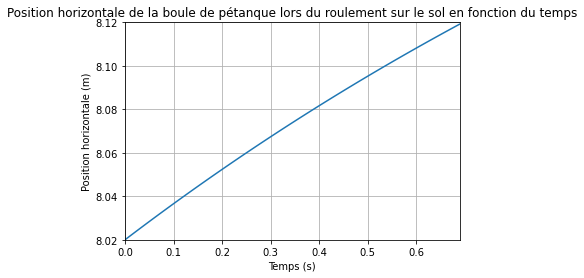

In [13]:
# On trace le résultat
plt.plot(t, urk4_2[0, :])
plt.xlabel('Temps (s)')
plt.ylabel('Position horizontale (m)')
plt.title('Position horizontale de la boule de pétanque lors du roulement sur le sol en fonction du temps')
plt.xlim(0, 0.69)
plt.ylim(8.02, 8.12)
plt.grid()
plt.show()

In [14]:
print(urk4_2[2, 69])
print(urk4_2[0, 69])

0.12039746008974321
8.119205079820514


Vitesse sur l'axe x avant la collision  $\approx 0.12$ m/s.

## 4. Collision avec l'autre boule

Conservation de l'énergie cinétique ($\Delta E_c = 0$).

$ E_{c,i} = E_{c,f}$

$\frac{1}{2} m_1 v_{1,i} ^2 + \frac{1}{2} m_2 v_{2,i} ^2 = \frac{1}{2} m_1 v_{1,f}^2 + \frac{1}{2} m_2 v_{2,i} ^2$

Or $v_{2,i} = 0$ et les deux boules ont la même masse donc  $$v_{1,i} = v_{1,f} + v_{2,f} $$


coefficient de restitution entre les deux boules en acier : $e_2 = 0.95$, donc la boule $1$ donnera 95% de sa vitesse a la boule $2$

$v_{1,i} = 0.05v_{1,f} + 0.95v_{2,f}$

Donc $v_{2f} = 0.16$ m/s

et $v_{1f} = 0.01$ m/s

## 5. Positions finales des boules

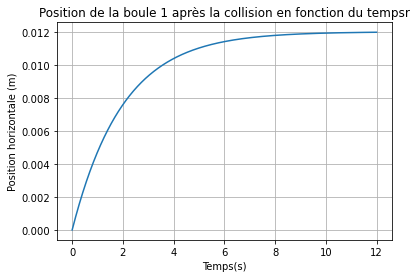

In [15]:
def derivee_v_1(v_1, t, ks):
   
    dxdt = v_1[2] * 0.05
    dydt = 0 
    dvxdt = -ks * v_1[2]
    dvydt = 0
    return np.array([dxdt, dydt, dvxdt, dvydt])

def rk4_3(start, end, step, ks, v_1_ini):
    interval = end - start
    num_points = int(interval / step) + 1
    t = np.linspace(start, end, num_points)
    ordre = len(v_1_ini)
    v_1 = np.empty((ordre, num_points))
    v_1[:, 0] = v_1_ini

    for i in range(num_points - 1):
        d1 = derivee_v_1(v_1[:, i], t[i], ks)
        d2 = derivee_v_1(v_1[:, i] + step / 2 * d1, t[i] + step / 2, ks)
        d3 = derivee_v_1(v_1[:, i] + step / 2 * d2, t[i] + step / 2, ks)
        d4 = derivee_v_1(v_1[:, i] + step * d3, t[i] + step, ks)
        v_1[:, i + 1] = v_1[:, i] + step / 6 * (d1 + 2 * d2 + 2 * d3 + d4)

    return t, v_1


ti = 0
te = 12
step = 0.01
v_0 = 8  # vitesse initiale en m/s
theta = np.pi / 4  # angle de tir en radians
g = 9.81  # accélération due à la gravité en m/s^2
m = 0.8  # masse de la boule de pétanque en kg
ks = 0.5  # force de frottement de l'air en N*s/m
v_1 = np.array([0, 0, 0.12, 0])  # Conditions initiales [x0, y0, vx0, vy0]


t, vrk4_1 = rk4_3(ti, te, step, ks, v_1)


plt.plot(t, vrk4_1[0, :])
plt.xlabel('Temps(s)')
plt.ylabel('Position horizontale (m)')
plt.title("Position de la boule 1 après la collision en fonction du tempsr")
plt.grid()
plt.show()

In [16]:
print(vrk4_1[0, 1200])

0.011970254973879034


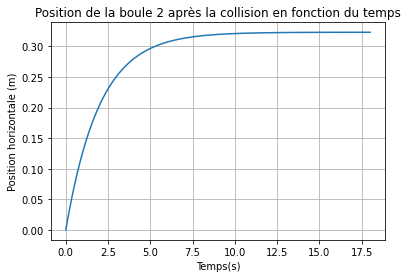

In [17]:
def derivee_v_1(v_1, t, ks):
   
    dxdt = v_1[2] * 0.95
    dydt = 0 
    dvxdt = -ks * v_1[2]
    dvydt = 0
    return np.array([dxdt, dydt, dvxdt, dvydt])

def rk4_3(start, end, step, ks, v_1_ini):
    interval = end - start
    num_points = int(interval / step) + 1
    t = np.linspace(start, end, num_points)
    ordre = len(v_1_ini)
    v_1 = np.empty((ordre, num_points))
    v_1[:, 0] = v_1_ini

    for i in range(num_points - 1):
        d1 = derivee_v_1(v_1[:, i], t[i], ks)
        d2 = derivee_v_1(v_1[:, i] + step / 2 * d1, t[i] + step / 2, ks)
        d3 = derivee_v_1(v_1[:, i] + step / 2 * d2, t[i] + step / 2, ks)
        d4 = derivee_v_1(v_1[:, i] + step * d3, t[i] + step, ks)
        v_1[:, i + 1] = v_1[:, i] + step / 6 * (d1 + 2 * d2 + 2 * d3 + d4)

    return t, v_1


ti = 0
te = 18
step = 0.01
ks = 0.5  # force de frottement de l'air en N*s/m
v_1 = np.array([0, 0, 0.17, 0])  # Conditions initiales [x0, y0, vx0, vy0]


t, vrk4_2 = rk4_3(ti, te, step, ks, v_1)


plt.plot(t, vrk4_2[0, :])
plt.xlabel('Temps(s)')
plt.ylabel('Position horizontale (m)')
plt.title("Position de la boule 2 après la collision en fonction du temps")
plt.grid()
plt.show()

In [18]:
print(vrk4_2[0, 1500])

0.3228213537484352


Position finale de la première boule : $8.02 + 0.1 +0.012 \approx 8.14$ m

Position finale de la deuxième boule : $8.02 + 0.1 + 0.32 \approx 8.44$ m

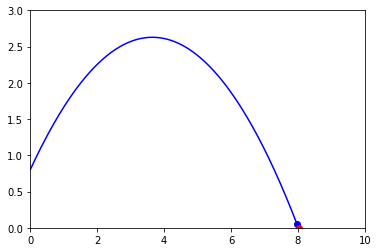

In [20]:
# Données pour la première courbe
x_1 = urk4[0, :190]
y_1 = urk4[1, :190]

# Données pour la deuxième courbe
x_2 = urk4_2[0, :]
y_2 = np.zeros(len(vrk4_2[0, :])) 

plt.rcParams["animation.writer"] = "pillow"

fig, ax = plt.subplots()

line_1, = ax.plot([],[], color='blue')
line_2, = ax.plot([],[], color='red')  # Deuxième courbe en rouge
point_1, = ax.plot([], [], ls="none", marker="o", color='blue')
point_2, = ax.plot([], [], ls="none", linewidth = 3, marker="o", color='red')  # Point pour la deuxième courbe

ax.set_xlim(0, 10)
ax.set_ylim(0, 3)

# Création d'une fonction pour l'animation
def animate(k):
    i = min(k, x_1.size)
    if i < x_1.size:  # Trace la première courbe
        line_1.set_data([x_1[:i]], [y_1[:i]])
        point_1.set_data([x_1[i]], [y_1[i]])
        
        line_2.set_data([], [])  # Ne trace pas la deuxième courbe
        point_2.set_data([], [])  # Ne trace pas le point pour la deuxième courbe
    else:  # Commence à tracer la deuxième courbe
        j = min(i - x_1.size, x_2.size)
        line_2.set_data([x_2[:j]], [y_2[:j]])
        point_2.set_data([x_2[j]], [y_2[j]])
        
        line_1.set_data([x_1], [y_1])  # Trace la première courbe 
        point_1.set_data([x_1[-1]], [y_1[-1]])  # Dernier point de la première courbe
        
    return line_1, line_2, point_1, point_2

ani = animation.FuncAnimation(fig=fig, func=animate, frames=range(x_1.size + x_2.size), interval=50, blit=True)

ani.save(filename="courbes.gif", fps=20)

HTML("""<img src="courbes.gif" />""")